In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [12]:
#This example uses Python 2.7 and the python-request library.


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b887d2e0-4101-4826-b790-d66832d4aef7',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
#  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [11]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\HP\AppData\Local\Temp\ipykernel_9904\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19455281.00000,19455281.00000,False,NaN,1,NaN,NaN,None,2023-08-12T18:05:00.000Z,29409.34307,6470130134.02631,-37.64870,-0.12163,0.32512,1.31871,-5.56331,13.80572,9.17436,572167033486.22876,48.72370,617596204506.67004,None,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 18:07:17.903653
1,1027,Ethereum,ETH,ethereum,7228,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120147264.77682,120147264.77682,True,NaN,2,NaN,NaN,None,2023-08-12T18:05:00.000Z,1847.83739,2430327197.56879,-26.59780,-0.15236,0.37972,0.88245,-7.32417,6.32074,2.32724,222012608469.36710,18.90650,222012608469.37000,None,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 18:07:17.903653
2,825,Tether USDt,USDT,tether,59314,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83410866925.61348,86684257831.22595,True,NaN,3,NaN,NaN,None,2023-08-12T18:05:00.000Z,0.99959,13681921374.84267,-77.36700,0.00368,0.07487,0.07790,-0.06425,-0.00967,-0.08142,83376807265.31250,7.10010,86648861527.55000,None,2023-08-12T18:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-12 18:07:17.903653
3,1839,BNB,BNB,bnb,1565,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153853066.08450,153853066.08450,False,NaN,4,NaN,NaN,None,2023-08-12T18:05:00.000Z,240.56468,290822587.07077,-23.71460,-0.11930,0.72457,-0.67283,-5.84641,1.47338,-23.08683,37011613541.87759,3.15190,37011613541.88000,None,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 18:07:17.903653
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52787284454.00000,99988519823.00000,False,NaN,5,NaN,NaN,None,2023-08-12T18:05:00.000Z,0.62955,514492815.27331,-43.80310,-0.13809,0.02508,0.69531,-17.80217,23.04294,47.70776,33232241787.69115,2.82990,62955012994.94000,None,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 18:07:17.903653
5,3408,USD Coin,USDC,usd-coin,13582,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26138995277.81689,26138995277.81689,False,NaN,6,NaN,NaN,None,2023-08-12T18:05:00.000Z,1.00018,1774617130.39838,-28.22700,0.00759,0.01533,0.02616,0.00938,0.03429,0.02090,26143759613.64954,2.22630,26143759613.65000,None,2023-08-12T18:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-12 18:07:17.903653
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140561576383.70520,140561576383.70520,True,NaN,7,NaN,NaN,None,2023-08-12T18:05:00.000Z,0.07679,285112372.65608,25.55400,-0.18131,2.02268,1.41193,10.33078,25.67459,6.65622,10794343236.29839,0.91920,10794343236.30000,None,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 18:07:17.903653
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35034417787.00200,36061170836.35500,False,NaN,8,NaN,NaN,None,2023-08-12T18:05:00.000Z,0.29277,111080908.93108,-21.49390,-0.18717,-0.53756,0.31706,-12.24845,7.32026,-20.84138,10256945263.45620,0.87340,13174545661.40000,None,2023-08-12T18:05:00.00

In [15]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '20',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'b887d2e0-4101-4826-b790-d66832d4aef7',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
       
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df 
    csv_path = r'C:\Users\HP\OneDrive\Documents\crypto project\API.csv'
    
    if not os.path.isfile(csv_path):
        df.to_csv(csv_path, header='column_names', index=False)
    else:
        df.to_csv(csv_path, mode='a', header=False, index=False)


In [16]:
import os
from time import sleep

df = pd.DataFrame()

for i in range(10):
    api_runner()
    print('API run is completed')
    sleep(600)

exit()

API run is completed
API run is completed
API run is completed
API run is completed
API run is completed
API run is completed
API run is completed
API run is completed
API run is completed
API run is completed


In [35]:
df72 = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\crypto project\API.csv')
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19455281.00000,19455281.00000,False,NaN,1,NaN,NaN,NaN,2023-08-12T18:05:00.000Z,29409.34307,6470130134.02631,-37.64870,-0.12163,0.32512,1.31871,-5.56331,13.80572,9.17436,572167033486.22876,48.72370,617596204506.67004,NaN,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 23:37:30.840123
1,1027,Ethereum,ETH,ethereum,7228,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120147264.77682,120147264.77682,True,NaN,2,NaN,NaN,NaN,2023-08-12T18:05:00.000Z,1847.83739,2430327197.56879,-26.59780,-0.15236,0.37972,0.88245,-7.32417,6.32074,2.32724,222012608469.36710,18.90650,222012608469.37000,NaN,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 23:37:30.840123
2,825,Tether USDt,USDT,tether,59314,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83410866925.61348,86684257831.22595,True,NaN,3,NaN,NaN,NaN,2023-08-12T18:05:00.000Z,0.99959,13681921374.84267,-77.36700,0.00368,0.07487,0.07790,-0.06425,-0.00967,-0.08142,83376807265.31250,7.10010,86648861527.55000,NaN,2023-08-12T18:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-12 23:37:30.840123
3,1839,BNB,BNB,bnb,1565,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153853066.08450,153853066.08450,False,NaN,4,NaN,NaN,NaN,2023-08-12T18:05:00.000Z,240.56468,290822587.07077,-23.71460,-0.11930,0.72457,-0.67283,-5.84641,1.47338,-23.08683,37011613541.87760,3.15190,37011613541.88000,NaN,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 23:37:30.840123
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52787284454.00000,99988519823.00000,False,NaN,5,NaN,NaN,NaN,2023-08-12T18:05:00.000Z,0.62955,514492815.27331,-43.80310,-0.13809,0.02508,0.69531,-17.80217,23.04294,47.70776,33232241787.69115,2.82990,62955012994.94000,NaN,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 23:37:30.840123
5,3408,USD Coin,USDC,usd-coin,13582,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26138995277.81689,26138995277.81689,False,NaN,6,NaN,NaN,NaN,2023-08-12T18:05:00.000Z,1.00018,1774617130.39838,-28.22700,0.00759,0.01533,0.02616,0.00938,0.03429,0.02090,26143759613.64954,2.22630,26143759613.65000,NaN,2023-08-12T18:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-12 23:37:30.840123
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140561576383.70520,140561576383.70520,True,NaN,7,NaN,NaN,NaN,2023-08-12T18:05:00.000Z,0.07679,285112372.65608,25.55400,-0.18131,2.02268,1.41193,10.33078,25.67459,6.65622,10794343236.29839,0.91920,10794343236.30000,NaN,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-12 23:37:30.840123
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35034417787.00200,36061170836.35500,False,NaN,8,NaN,NaN,NaN,2023-08-12T18:05:00.000Z,0.29277,111080908.93108,-21.49390,-0.18717,-0.53756,0.31706,-12.24845,7.32026,-20.84138,10256945263.45620,0.87340,13174545661.40000,NaN,2023-08-12T18:05:00.000Z,NaN,NaN,NaN,N

In [36]:
drop_columns = ['tags','max_supply','circulating_supply','total_supply','infinite_supply','tvl_ratio','last_updated','platform','self_reported_circulating_supply','self_reported_market_cap','quote.USD.market_cap','quote.USD.market_cap_dominance','quote.USD.fully_diluted_market_cap','quote.USD.tvl','platform.id','platform.name','platform.symbol','platform.slug','platform.token_address','quote.USD.last_updated']
df = df72.drop(columns = drop_columns)
df

,id,name,symbol,slug,num_market_pairs,date_added,cmc_rank,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,1,29409.34307,6470130134.02631,-37.64870,-0.12163,0.32512,1.31871,-5.56331,13.80572,9.17436,2023-08-12 23:37:30.840123
1,1027,Ethereum,ETH,ethereum,7228,2015-08-07T00:00:00.000Z,2,1847.83739,2430327197.56879,-26.59780,-0.15236,0.37972,0.88245,-7.32417,6.32074,2.32724,2023-08-12 23:37:30.840123
2,825,Tether USDt,USDT,tether,59314,2015-02-25T00:00:00.000Z,3,0.99959,13681921374.84267,-77.36700,0.00368,0.07487,0.07790,-0.06425,-0.00967,-0.08142,2023-08-12 23:37:30.840123
3,1839,BNB,BNB,bnb,1565,2017-07-25T00:00:00.000Z,4,240.56468,290822587.07077,-23.71460,-0.11930,0.72457,-0.67283,-5.84641,1.47338,-23.08683,2023-08-12 23:37:30.840123
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,5,0.62955,514492815.27331,-43.80310,-0.13809,0.02508,0.69531,-17.80217,23.04294,47.70776,2023-08-12 23:37:30.840123
5,3408,USD Coin,USDC,usd-coin,13582,2018-10-08T00:00:00.000Z,6,1.00018,1774617130.39838,-28.22700,0.00759,0.01533,0.02616,0.00938,0.03429,0.02090,2023-08-12 23:37:30.840123
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,7,0.07679,285112372.65608,25.55400,-0.18131,2.02268,1.41193,10.33078,25.67459,6.65622,2023-08-12 23:37:30.840123
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,8,0.29277,111080908.93108,-21.49390,-0.18717,-0.53756,0.31706,-12.24845,7.32026,-20.84138,2023-08-12 23:37:30.840123
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z,9,24.66982,233135574.02745,-26.10320,-0.40520,0.88021,9.46923,-5.14526,65.90819,17.57027,2023-08-12 23:37:30.840123
9,1958,TRON,TRX,tron,808,2017-09-13T00:00:00.000Z,10,0.07734,129256156.15678,-11.28280,-0.08237,0.59657,0.22493,-3.99439,8.00929,11.82574,2023-08-12 23:37:30.840123


In [37]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,cmc_rank,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,1,29409.34307,6470130134.02631,-37.64870,-0.12163,0.32512,1.31871,-5.56331,13.80572,9.17436,2023-08-12 23:37:30.840123
1,1027,Ethereum,ETH,ethereum,7228,2015-08-07T00:00:00.000Z,2,1847.83739,2430327197.56879,-26.59780,-0.15236,0.37972,0.88245,-7.32417,6.32074,2.32724,2023-08-12 23:37:30.840123
2,825,Tether USDt,USDT,tether,59314,2015-02-25T00:00:00.000Z,3,0.99959,13681921374.84267,-77.36700,0.00368,0.07487,0.07790,-0.06425,-0.00967,-0.08142,2023-08-12 23:37:30.840123
3,1839,BNB,BNB,bnb,1565,2017-07-25T00:00:00.000Z,4,240.56468,290822587.07077,-23.71460,-0.11930,0.72457,-0.67283,-5.84641,1.47338,-23.08683,2023-08-12 23:37:30.840123
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,5,0.62955,514492815.27331,-43.80310,-0.13809,0.02508,0.69531,-17.80217,23.04294,47.70776,2023-08-12 23:37:30.840123
5,3408,USD Coin,USDC,usd-coin,13582,2018-10-08T00:00:00.000Z,6,1.00018,1774617130.39838,-28.22700,0.00759,0.01533,0.02616,0.00938,0.03429,0.02090,2023-08-12 23:37:30.840123
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,7,0.07679,285112372.65608,25.55400,-0.18131,2.02268,1.41193,10.33078,25.67459,6.65622,2023-08-12 23:37:30.840123
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,8,0.29277,111080908.93108,-21.49390,-0.18717,-0.53756,0.31706,-12.24845,7.32026,-20.84138,2023-08-12 23:37:30.840123
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z,9,24.66982,233135574.02745,-26.10320,-0.40520,0.88021,9.46923,-5.14526,65.90819,17.57027,2023-08-12 23:37:30.840123
9,1958,TRON,TRX,tron,808,2017-09-13T00:00:00.000Z,10,0.07734,129256156.15678,-11.28280,-0.08237,0.59657,0.22493,-3.99439,8.00929,11.82574,2023-08-12 23:37:30.840123


In [38]:
df['timestamp'] = df['timestamp'].replace(['2023-08-12 23:37:30.840123','2023-08-12 23:47:33.579098','2023-08-12 23:57:34.245999','2023-08-13 00:07:38.274629','2023-08-13 00:17:38.926134','2023-08-13 00:27:40.914294','2023-08-13 00:37:41.988745','2023-08-13 00:47:43.580765','2023-08-13 00:57:44.599133','2023-08-13 01:07:45.270922'],['23:37','23:47','23:57','00:07','00:17','00:27','00:37','00:47','00:57','01:07'])
df

,id,name,symbol,slug,num_market_pairs,date_added,cmc_rank,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,1,29409.34307,6470130134.02631,-37.64870,-0.12163,0.32512,1.31871,-5.56331,13.80572,9.17436,23:37
1,1027,Ethereum,ETH,ethereum,7228,2015-08-07T00:00:00.000Z,2,1847.83739,2430327197.56879,-26.59780,-0.15236,0.37972,0.88245,-7.32417,6.32074,2.32724,23:37
2,825,Tether USDt,USDT,tether,59314,2015-02-25T00:00:00.000Z,3,0.99959,13681921374.84267,-77.36700,0.00368,0.07487,0.07790,-0.06425,-0.00967,-0.08142,23:37
3,1839,BNB,BNB,bnb,1565,2017-07-25T00:00:00.000Z,4,240.56468,290822587.07077,-23.71460,-0.11930,0.72457,-0.67283,-5.84641,1.47338,-23.08683,23:37
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,5,0.62955,514492815.27331,-43.80310,-0.13809,0.02508,0.69531,-17.80217,23.04294,47.70776,23:37
5,3408,USD Coin,USDC,usd-coin,13582,2018-10-08T00:00:00.000Z,6,1.00018,1774617130.39838,-28.22700,0.00759,0.01533,0.02616,0.00938,0.03429,0.02090,23:37
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,7,0.07679,285112372.65608,25.55400,-0.18131,2.02268,1.41193,10.33078,25.67459,6.65622,23:37
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,8,0.29277,111080908.93108,-21.49390,-0.18717,-0.53756,0.31706,-12.24845,7.32026,-20.84138,23:37
8,5426,Solana,SOL,solana,497,2020-04-10T00:00:00.000Z,9,24.66982,233135574.02745,-26.10320,-0.40520,0.88021,9.46923,-5.14526,65.90819,17.57027,23:37
9,1958,TRON,TRX,tron,808,2017-09-13T00:00:00.000Z,10,0.07734,129256156.15678,-11.28280,-0.08237,0.59657,0.22493,-3.99439,8.00929,11.82574,23:37


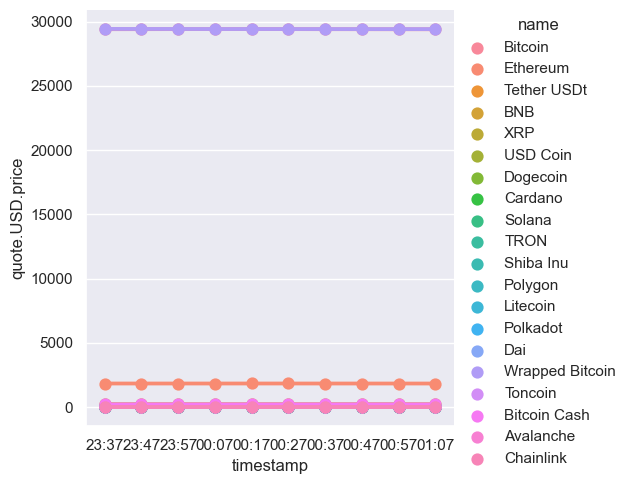

In [28]:
sns.catplot(x='timestamp', y='quote.USD.price', hue='name', data=df, kind='point')

In [29]:
bt = df[['name','quote.USD.price','timestamp']]
bt = bt.query("name != 'Bitcoin'")
bt

,name,quote.USD.price,timestamp
0,Bitcoin,29409.34307,23:37
20,Bitcoin,29411.90117,23:47
40,Bitcoin,29415.41957,23:57
60,Bitcoin,29417.74628,00:07
80,Bitcoin,29421.03337,00:17
100,Bitcoin,29415.85005,00:27
120,Bitcoin,29410.47214,00:37
140,Bitcoin,29408.53196,00:47
160,Bitcoin,29405.13482,00:57
180,Bitcoin,29404.22426,01:07


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

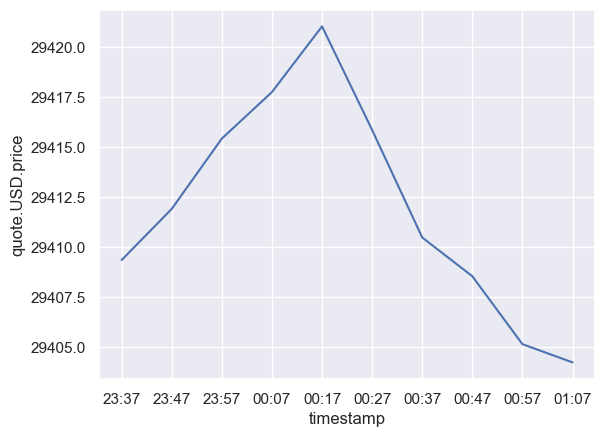

In [30]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = bt)

In [40]:
et = df[['name','quote.USD.price','timestamp']]
et = et.query("name == 'Ethereum'")
et

,name,quote.USD.price,timestamp
1,Ethereum,1847.83739,23:37
21,Ethereum,1847.75602,23:47
41,Ethereum,1847.53167,23:57
61,Ethereum,1847.56732,00:07
81,Ethereum,1848.28928,00:17
101,Ethereum,1848.07520,00:27
121,Ethereum,1847.53415,00:37
141,Ethereum,1847.44840,00:47
161,Ethereum,1847.13840,00:57
181,Ethereum,1846.83883,01:07


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

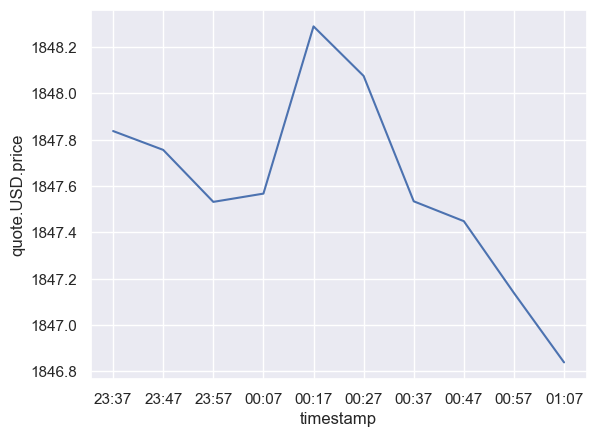

In [41]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = et)